In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###Polynomial Regression

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
path = "/content/drive/My Drive/PROJECT 1001/most_final_dataset.csv"
data = pd.read_csv(path)
print(data.head())
print(data.shape)

   Unnamed: 0  MONTH  ...  DELAY_PROB_DEST  DelayScore_DEST
0           0      1  ...         0.115987                2
1           1      1  ...         0.183486                4
2           2      1  ...         0.173913                4
3           3      1  ...         0.155594                3
4           4      1  ...         0.129496                3

[5 rows x 24 columns]
(332480, 24)


In [0]:
data = data[data['ARR_DEL15'] == 1.0]
data = data.drop(['Unnamed: 0', 'ARR_DEL15'], axis=1)
data = data.dropna(axis=0)
print(data.head())
print(data.shape)

     MONTH  DAY_OF_WEEK  ...  DELAY_PROB_DEST  DelayScore_DEST
700      1            3  ...         0.106061                2
701      1            3  ...         0.105085                2
702      1            4  ...         0.148936                3
703      1            1  ...         0.212121                4
704      1            4  ...         0.236842                5

[5 rows x 22 columns]
(165236, 22)


In [0]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, x_train, y_train, x_test, y_test, case):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  x_train_poly = poly_features.fit_transform(x_train)
  
  poly_model = LinearRegression()
  poly_model.fit(x_train_poly, y_train)

  #print("Coefficients\n", poly_model.coef_)
  
  y_train_predicted = poly_model.predict(x_train_poly)

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
  r2_test = r2_score(y_test, y_test_predicted)

  plot_residual(y_train_predicted, y_train, 'Train', degree, case)
  plot_residual(y_test_predicted, y_test, 'Test', degree, case)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [0]:
def plot_residual(y_pred, y_obs, name, degree, case):
  plt.figure()
  res = y_obs - y_pred
  plt.scatter(y_pred, res)
  plt.axhline(0, color = 'r')
  plt.xlabel('Fitted')
  plt.ylabel('Residual')
  title = 'Residual Plot || '+ name + ' Set, Degree: ' + str(degree)
  plt.title(title)
  filename = '/content/drive/My Drive/PROJECT 1001/Figures/' + name + str(degree) +'(' + case +')_Residual.png'
  plt.savefig(filename)
  plt.show()


In [0]:
# Case 0: Considering All Features
# X1 = data.drop(['ARR_DELAY'], axis = 1)
# y1 = data['ARR_DELAY']

# x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

# for i in range(1,4):
#   print("Degree: ", i, "\n")
#   create_polynomial_regression_model(i, x_train1, y_train1, x_test1, y_test1)
#   print()


Degree:  1 



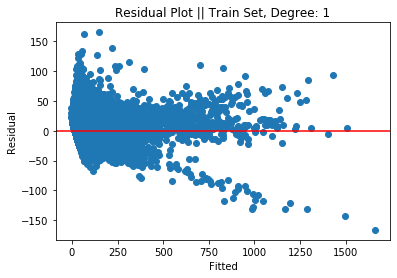

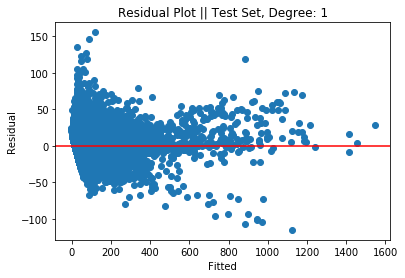

The model performance for the training set
-------------------------------------------
RMSE of training set is 11.999375168195483
R2 score of training set is 0.9714695939260861


The model performance for the test set
-------------------------------------------
RMSE of test set is 11.81356218224207
R2 score of test set is 0.973086325163916

Degree:  2 



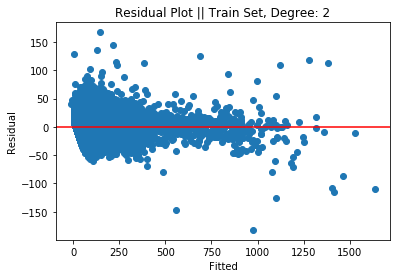

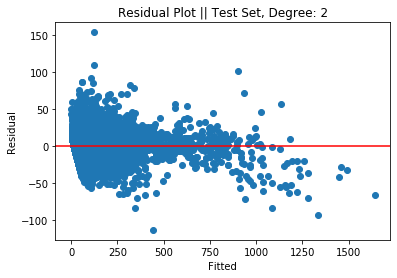

The model performance for the training set
-------------------------------------------
RMSE of training set is 9.492567730596582
R2 score of training set is 0.9821450722124729


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.472729871471252
R2 score of test set is 0.9826954000462115

Degree:  3 



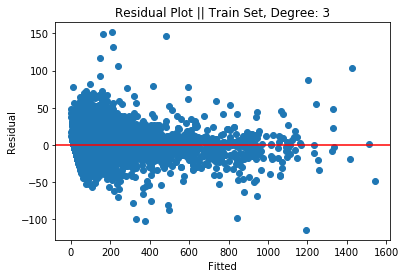

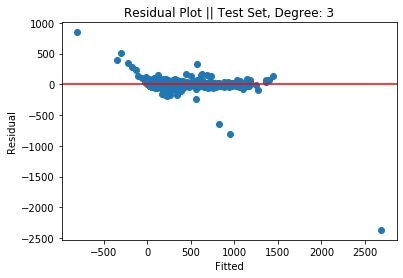

The model performance for the training set
-------------------------------------------
RMSE of training set is 8.62667214618763
R2 score of training set is 0.9852538965881799


The model performance for the test set
-------------------------------------------
RMSE of test set is 14.439918240557024
R2 score of test set is 0.9597893839906417



In [0]:
# Case 1: With Departure Info
X2 = data.drop(['ARR_DELAY', 'DELAY_TO_NO_DELAY_RATIO', 'DELAY_PROB', 'DISTANCE', 'DEP_DELAY_GROUP', 'WHEELS_OFF'], axis = 1)
y2 = data['ARR_DELAY']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.40, random_state=0)

for i in range(1,4):
  print("Degree: ", i, "\n")
  create_polynomial_regression_model(i, x_train2, y_train2, x_test2, y_test2, 'with_dep')
  print()

In [0]:
# # Case 2: Without Departure Info
# X3 = data.drop(['ARR_DELAY', 'DELAY_TO_NO_DELAY_RATIO', 'DELAY_PROB', 'DISTANCE', 'DEP_DELAY_GROUP', 'TAXI_OUT', 'WHEELS_OFF', 'DEP_DEL15'], axis = 1)
# y3 = data['ARR_DELAY']

# x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)

# for i in range(1,4):
#   print("Degree: ", i, "\n")
#   create_polynomial_regression_model(i, x_train3, y_train3, x_test3, y_test3, 'no_dep')
#   print()

Degree 1 shows heteroscedasticity on the residual plot of both the training set and test set, suggesting that linear regression is not a good fit. Degree 3 shows outliers in the residual plot of the training set, suggesting that the regression line is not a good fit. This is also reflected in the RMSE, which is low for the training set but very high for the test set, indicating overfittting. Regression with degree 2 shows a residual plot which is fairly centered around 0 and symmetrical. It is slightly x-axis unbalanced, as seen by the clustering towards the left side of the x-axis, suggesting that this may not be the optimal model, but it performs best out of the three options, as reflected in the rmse and R^2 values as well.